In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline

In [18]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [19]:
init_notebook_mode(connected=True)
cf.go_offline()

In [20]:
df=pd.read_csv('CRUDEPALMOIL.csv')

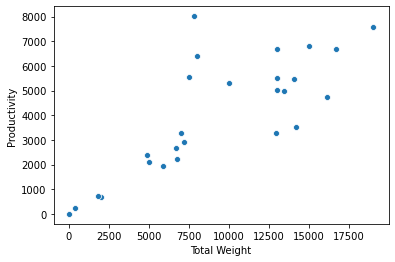

In [21]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [22]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.0,26.000000,26.000000,26.000000,22.000000
mean,171.076923,193658.769231,28.743846,62.576154,9278.816077,0.092692,0.009269,0.0,0.411154,32.694615,4028.000000,31884.486318
std,107.657577,3331.490085,27.159439,68.556282,5291.023165,0.052957,0.005296,0.0,1.360242,44.359948,2345.179859,10310.775673
min,8.000000,190896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,14031.000000
25%,125.500000,191609.750000,0.000000,0.000000,6096.988000,0.062500,0.006250,0.0,0.000000,0.000000,2274.110000,25671.774250
50%,175.500000,192531.500000,31.235000,43.125000,7899.997000,0.080000,0.008000,0.0,0.000000,0.000000,4127.735000,32887.000000
75%,203.500000,193079.000000,55.787500,118.272500,13300.486750,0.130000,0.013000,0.0,0.000000,61.625000,5531.590000,41207.000000
max,490.000000,200336.000000,72.350000,209.580000,18999.961000,0.190000,0.019000,0.0,5.080000,148.130000,8011.410000,45286.000000


In [85]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [86]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [87]:
print(lm.intercept_)

1162.881608222538


In [88]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.328356


In [89]:
predictions = lm.predict(X_test)

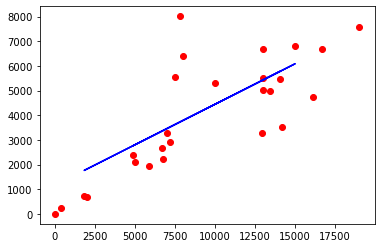

In [90]:
plt.scatter(X,y,color='red')
plt.plot(X_test,predictions,color='blue')

In [91]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 967.608533750997
MSE: 1212404.7286231024
RMSE: 1101.092515923663
r2_score: 0.72190196042185


In [75]:
joblib.dump(lm,"Crude_Palm_Oil.pkl")

['Crude_Palm_Oil.pkl']